Для выполнения домашнего задания необходимо взять boston house-prices datase (sklearn.datasets.load_boston) и сделать тоже самое для задачи регрессии (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество).

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

Загружаем дата сет

In [2]:
data =  pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
data.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


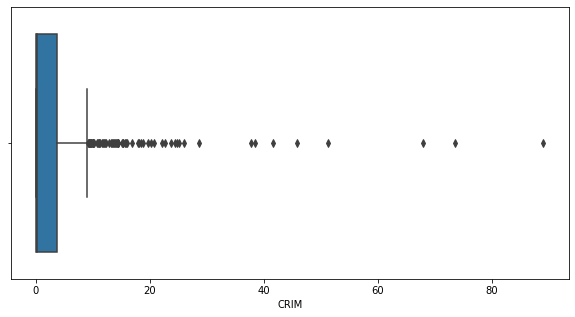

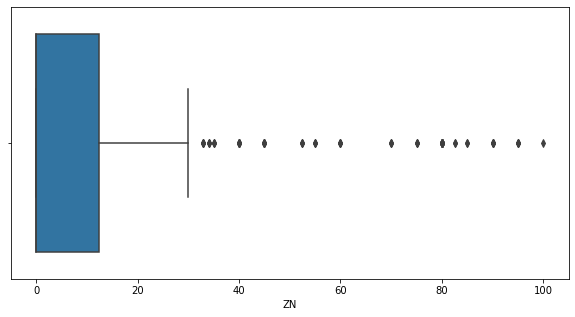

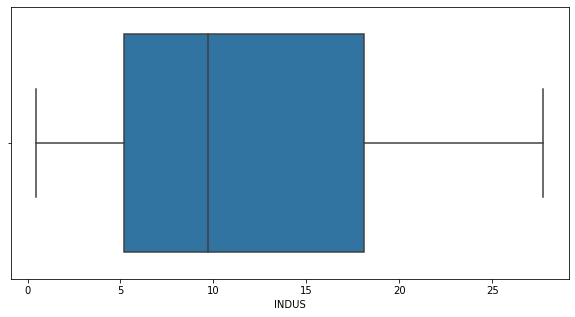

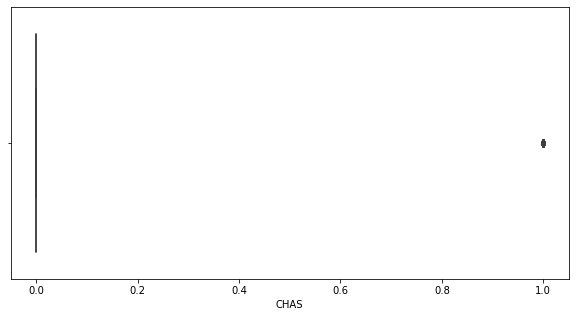

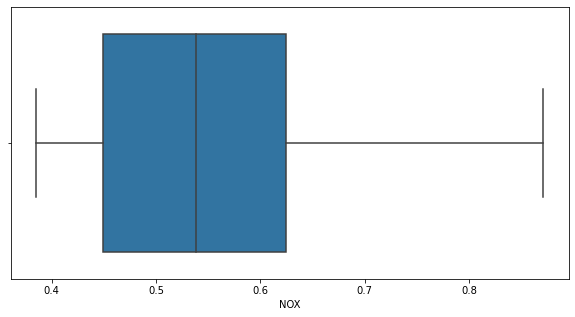

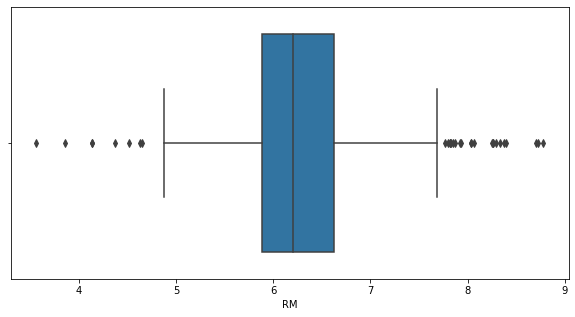

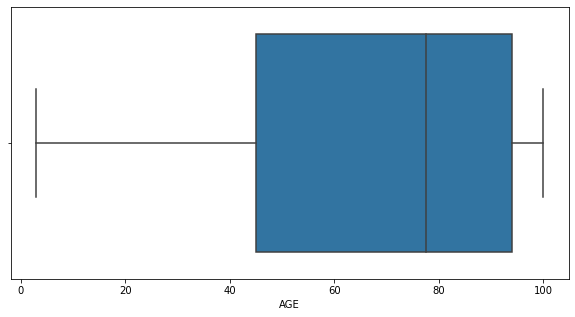

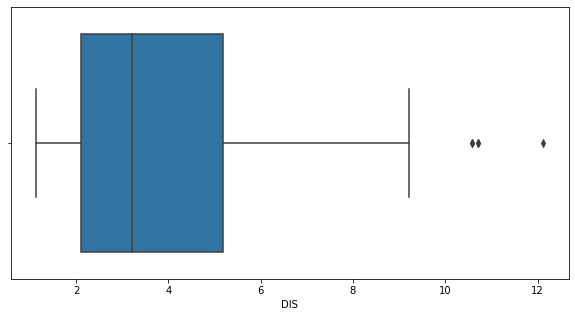

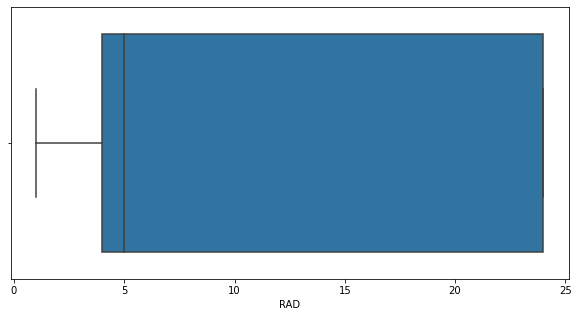

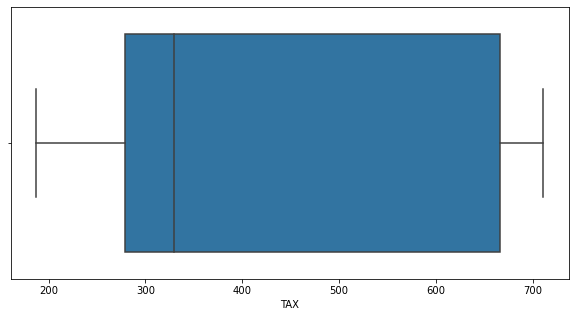

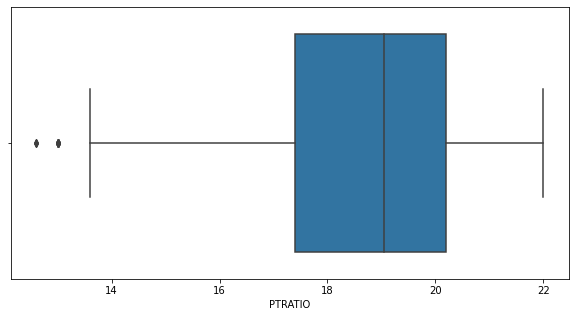

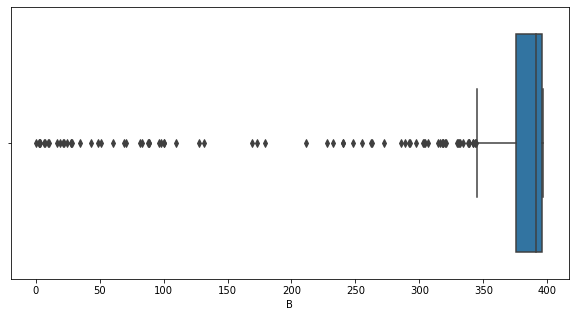

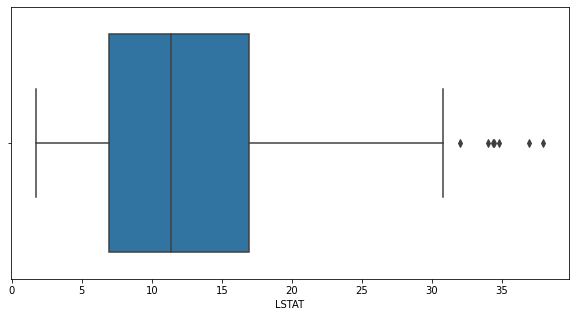

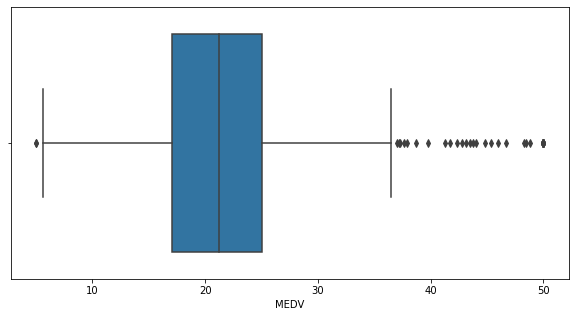

In [5]:
for i in data.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=data[i])

In [6]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Удалим выбросы из датафрейма

In [7]:
data['CRIM'] = data['CRIM'][ data['CRIM'] < 7 ]
data['ZN'] = data['ZN'][ data['ZN'] < 30 ]
data['RM'] = data['RM'][ (data['RM'] > 5) & (data['RM'] < 8) ]
data['DIS'] = data['DIS'][ data['DIS'] < 10 ]
data['PTRATIO'] = data['PTRATIO'][ data['PTRATIO'] > 14 ]
data['B'] = data['B'][ data['B'] > 340 ]
data['LSTAT'] = data['LSTAT'][ data['LSTAT'] < 31 ]

Удаленные значения заполяем средним

In [8]:
for i in data.columns:
    data[i]=data[i].fillna(data[i].mean())

Делим выборку на тестовую и учебную, и нормализвуем данные

In [9]:
X = data.drop(columns=['MEDV'])
y = data['MEDV']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
st_sc = StandardScaler()
X_train = st_sc.fit_transform(X_train)
X_test = st_sc.transform(X_test)

LinearRegression
======

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

Вычислим метрики

In [14]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

MSE: 23.66215099383118
MAE: 3.5254813822847724


KNN
======

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [16]:
knr_params = {'n_neighbors': list(range(3,30,1)),
              'weights': ['uniform', 'distance'],
              'algorithm': ['brute'],
              'leaf_size': list(range(5,50,1)),
              'p': [1, 2],
              'metric': ['euclidian','manhattan','chebyshev','minkowski']}

In [17]:
knr = GridSearchCV(KNeighborsRegressor(), knr_params, n_jobs=-1, cv=10)
knr = knr.fit(X_train, y_train).best_estimator_
y_pred = knr.predict(X_test)

In [19]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

MSE: 25.674697924753264
MAE: 3.1029221341406097


RandomForest
======

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [26]:
rfr_params = {'n_estimators': [5, 10, 20, 40],
              'criterion': ['mse', 'mae'],
              'max_depth': [5, 10, 20],
              'min_samples_split': [2, 4, 8, 16],
              'min_samples_leaf': [2, 4,  8, 16], 
              'max_features': ['auto', 'sqrt', 'log2']
             }

In [27]:
rfr = GridSearchCV(RandomForestRegressor(), rfr_params, n_jobs=-1, cv=10)
rfr = rfr.fit(X_train, y_train).best_estimator_
y_pred = rfr.predict(X_test)

In [29]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

MSE: 13.451527179276319
MAE: 2.5921546052631577


Сравниваем результаты
=====

Для данной задачи лучше всего подходит модель RandomForestRegressor.
Линейная Регрессия и алгоритм ближайших соседей показали результат похуже